<a href="https://colab.research.google.com/github/imou-imane/Telecom-churn-files/blob/master/Data1Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jeu de données Kaggle

In [ ]:
# Packages
import pandas as pd
import numpy as np

from sklearn import svm, tree
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# Graphe
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

from mlxtend.plotting import plot_decision_regions

## Séparation des données d'entraînement et de test
On spécifie d'abord la variable cible

70% pour les données d'entraînement et 30% pour le test

In [ ]:
# Seperating the target variable
def separtionDonnees(dataset):
    # Seperating the target variable
    X = dataset.drop("Churn", axis=1).values
    cible = dataset["Churn"].copy().values #churn
    
    
    # deviding data into traning and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, cible, test_size=0.3) #70% training and 30% test
    return X_train, X_test, y_train, y_test

## Matrice de correlation 
en forme de heat map

In [ ]:
#correlation entre les variables
def MatCorrelationHM(dataframe,  x, y, show_chart):
    fig = plt.figure(figsize = (x,y))
    data = dataframe.corr()
    if show_chart == True:
        sns.heatmap(data, 
                    xticklabels=data.columns.values,
                    yticklabels=data.columns.values,
                    annot=True)
    else :
      sns.heatmap(data, cmap='Blues')
        
    return data

## La correlation entre la variable churn et le reste des variables en bar

In [ ]:
def MatCorrelationBar(dataset):
  plt.rcParams['figure.figsize'] = [10 , 4]
  #correlation entre les differents parametres et churn
  dataset.corr()['Churn'].sort_values(ascending = False).plot(kind="bar")


## SVM en grid search

In [ ]:
def svm_func_gridS(dataset):
    svm_cl = svm.SVC()
    Cs = [0.501,0.5,0.75,1]
    gammas = [1,2,3,'auto']
    parametre = [{'kernel':['linear'], 'C':Cs},
                 {'kernel':['rbf'],'gamma': gammas,'C':Cs}]
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    classifieur = GridSearchCV(estimator=svm.SVC(),param_grid=parametre, cv=cv)
    
    X_train, X_test, y_train, y_test = separtionDonnees(dataset)
    display(X_train)
    
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(X_train)
    display(X)
    classifieur.fit(X_train,y_train)
    
    print ('Précision du svm + grid search: ')
    print(accuracy_score(y_test,classifieur.predict(X_test))*100) 
    
    print('gamma',classifieur.best_estimator_.gamma)
    print('C',classifieur.best_estimator_.C)
    print('Kernel',classifieur.best_estimator_.kernel)
    #print("accuracy:"+str(np.average(cross_val_score(classifieur, X_test, y_test, scoring='accuracy'))))
    #print("f1:"+str(np.average(cross_val_score(classifieur,X_test, y_test, scoring='f1'))))

## SVM en hyper parametre

In [ ]:
def svm_fun(dataset):
    clf = svm.SVC(kernel='linear', C=0.75, probability=True)
    X_train, X_test, y_train, y_test = separtionDonnees(dataset)
    
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    
    clf.fit(X_train,y_train)
    
    X_test = scaler.fit_transform(X_test)
    print ('Accuracy: ')
    print(accuracy_score(y_test,clf.predict(X_test))*100)
    
    print ('Precision: ')
    print(precision_score(y_test,clf.predict(X_test))*100)
    
    print ('Recall: ')
    print(recall_score(y_test,clf.predict(X_test))*100)
    
    print ('F1-score: ')
    print(f1_score(y_test,clf.predict(X_test))*100)
    
    print(confusion_matrix(y_test,clf.predict(X_test)))  
    
    X = dataset.drop("Churn", axis=1).values
    y = dataset["Churn"].copy().values
   # plot_decision_regions(X=X.values, 
                     # y=y.values,
                      #clf=clf, 
                      #legend=2)
    #plt.title('SVM Decision Region Boundary', size=16)
    
    print(X_test,clf.predict(X_test))
    
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    
    plt.title('Hyper SVM')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux de vrai positive')
    plt.xlabel('Taux de faux negative')
    plt.show()

## SVM non paramétré

In [ ]:
def svm_fun1(dataset):
    clf = svm.SVC(gamma='auto',probability=True)
    X_train, X_test, y_train, y_test = separtionDonnees(dataset)
    
    
    
    
    clf.fit(X_train,y_train)
    
    
    print ('Accuracy svm: ')
    print(accuracy_score(y_test,clf.predict(X_test))*100) 
    print ('Precision: ')
    print(precision_score(y_test,clf.predict(X_test))*100)
    print ('Recall: ')
    print(recall_score(y_test,clf.predict(X_test))*100)
    
    print ('F1-score: ')
    print(f1_score(y_test,clf.predict(X_test))*100)
    print(confusion_matrix(y_test,clf.predict(X_test)))  
    
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    
    plt.title('SVM non-parametre')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux de vrai positive')
    plt.xlabel('Taux de faux negative')
    plt.show()

## Arbre de décision

In [ ]:
def arbre_decision(dataset):
    clf = tree.DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = separtionDonnees(dataset)
    
    clf.fit(X_train,y_train)
    print ('acuuracy d\'arbre de decision: ')
    print(accuracy_score(y_test,clf.predict(X_test))*100) 
    print ('Precision: ')
    print(precision_score(y_test,clf.predict(X_test))*100)
    print ('Recall: ')
    print(recall_score(y_test,clf.predict(X_test))*100)
    
    print ('F1-score: ')
    print(f1_score(y_test,clf.predict(X_test))*100)
    print(confusion_matrix(y_test,clf.predict(X_test)))  
    
    
    y_score = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    
    plt.title('Arbre de decision')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux de vrai positive')
    plt.xlabel('Taux de faux negative')
    plt.show()

## Foret aleatoire

In [ ]:
def foretAleatoire(dataset):
    clf = RandomForestClassifier()
    X_train, X_test, y_train, y_test = separtionDonnees(dataset)

    clf.fit(X_train,y_train)
    print ('accuracy de forêt aleatoire: ')
    print(accuracy_score(y_test,clf.predict(X_test))*100) 
    print ('Precision: ')
    print(precision_score(y_test,clf.predict(X_test))*100)
    print ('Recall: ')
    print(recall_score(y_test,clf.predict(X_test))*100)
    
    print ('F1-score: ')
    print(f1_score(y_test,clf.predict(X_test))*100)
    print(confusion_matrix(y_test,clf.predict(X_test))) 
    
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    
    plt.title('Foret aleatoire')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux de vrai positive')
    plt.xlabel('Taux de faux negative')
    plt.show()

## Récuperation des données depuis github 
car on travail sur le cloud

In [ ]:
#Recuperation des données
url = 'https://raw.githubusercontent.com/imou-imane/Telecom-churn-files/master/Telco-Customer-Churn.csv'

Si on travail en local il suffit de modifier par le nom de fichier


```
 dataframe = pd.read_csv('Telco-Customer-Churn.csv')
```



In [ ]:
dataframe = pd.read_csv(url)
#Affichage des 5 premiers lignes
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Types des données
dataframe.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#dataframe.columns recupere le "title" de la colonne
#dataframe[item].unique()  recupere les éléments de la colonne sans repetition
#for j in dataframe.columns:
#    print(j)
 #   print (dataframe[j].unique())

## Convertion des données
Mettre tous les chaine de caracteres en miniscule (ou tous en majuscule) pour avoir une format unique

Remplacer: 

                    > yes/no            par 1/0
                   > male/female        par 0/1


In [ ]:
#Convertion des données 

#mettre en miniscule

for item in dataframe.columns:
    try:
        dataframe[item] = dataframe[item].str.lower() #metrre tous en miniscule
    except:
        print(item, "impossible de converter (type!=object)")
        


#Metrre les valeurs "yes" "no" en 1 et 0
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    dataframe[item].replace(to_replace='yes', value=1, inplace=True)
    dataframe[item].replace(to_replace='no',  value=0, inplace=True)
    

dataframe['gender'].replace(to_replace='female', value=1, inplace=True)
dataframe['gender'].replace(to_replace='male',  value=0, inplace=True)
    
#TotalCharges a des valeurs reél et un type object, traitant le cas
dataframe['TotalCharges'] = dataframe['TotalCharges'].replace(r'\s+', np.nan, regex=True)
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'])

#Traiter le cas des null
dataframe.isnull().sum(axis = 0)
dataframe = dataframe.fillna(value=0)

('SeniorCitizen', 'impossible de converter (type!=object)')
('tenure', 'impossible de converter (type!=object)')
('MonthlyCharges', 'impossible de converter (type!=object)')


## Affichage de matrice de correlation
que pour les données numerique

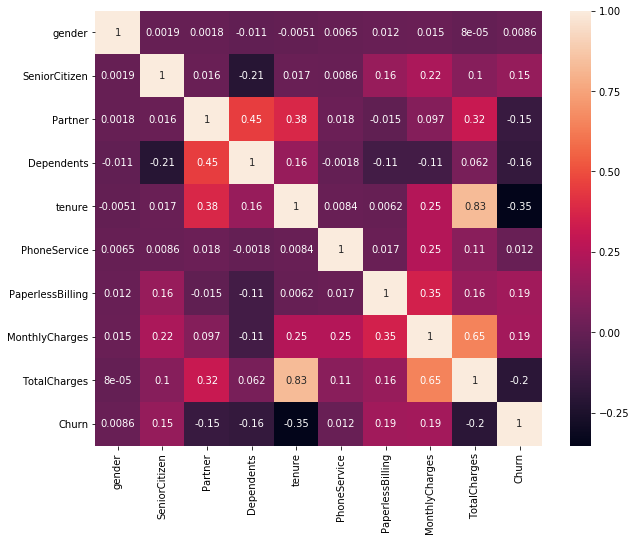

In [ ]:
correlation_df = MatCorrelationHM(dataframe,10,8,True )

## Histogramme pour les attributs de type numérique ou bouléen


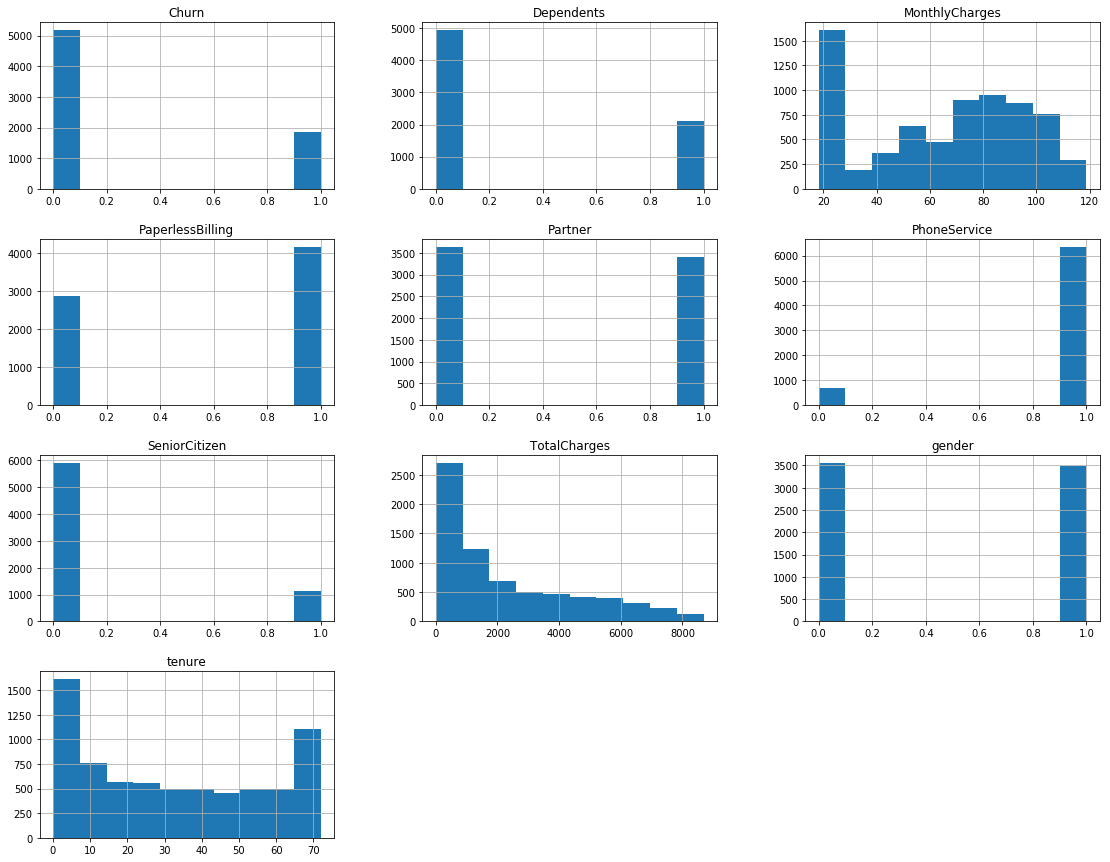

In [ ]:
dataframe.hist()
plt.rcParams['figure.figsize'] = [21,15]
plt.show()

In [ ]:
#scatter_matrix(dataframe)
#plt.rcParams['figure.figsize'] = [25,15]
#plt.show()
#plt.rcParams['figure.figsize'] = [10,5]

## Pourcentage de churn

In [ ]:
churns= dataframe['Churn']

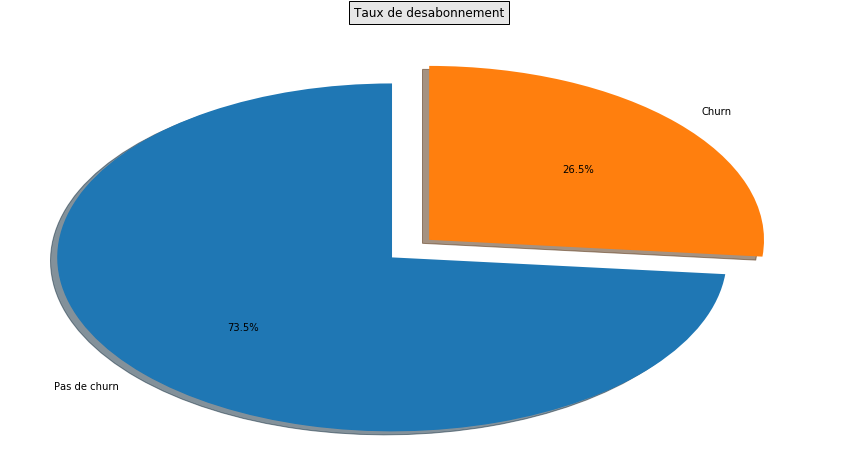

In [ ]:
PosChurn = NegChurn =0
for item in churns:
    if(item==1):
        PosChurn = PosChurn +1
    else :
        NegChurn = NegChurn + 1

fig1, ax1 = plt.subplots()
ax1.pie([NegChurn, PosChurn], explode=(0.15 , 0), labels=["Pas de churn", "Churn"], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Taux de desabonnement", bbox={'facecolor':'0.9', 'pad':5})
plt.rcParams['figure.figsize'] = [5 , 5]
plt.show()

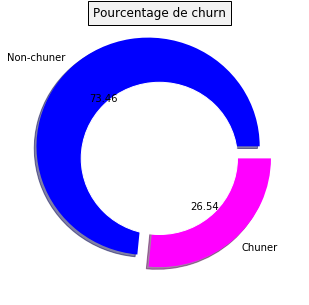

In [ ]:
PosChurn = NegChurn =0
for item in churns:
    if(item==1):
        PosChurn = PosChurn +1
    else :
        NegChurn = NegChurn + 1
  
my_circle=plt.Circle( (0,0), 0.7, color='white')
titres =  'Non-chuner', "Chuner"

plt.pie([NegChurn, PosChurn],
        labels= titres,
        colors=['blue','magenta'],
        explode=(0.15 , 0),
        shadow=True,
        autopct='%.2f')
plt.title("Pourcentage de churn", bbox={'facecolor':'0.95', 'pad':5})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.rcParams['figure.figsize'] = [5 , 5]

plt.show()

## Pré-traitement des données en (dummies) 

In [ ]:
ID = dataframe['customerID']
del dataframe['customerID']

In [ ]:
#Let's convert all the categorical variables into dummy variables
proccedData = df_dummies = pd.get_dummies(dataframe)

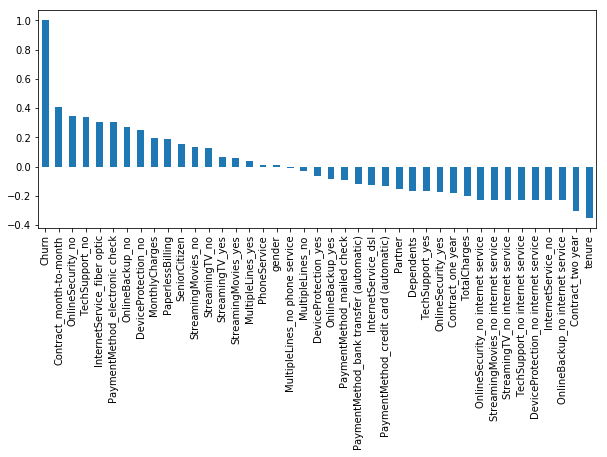

In [ ]:
MatCorrelationBar(proccedData)

### HeatMap pour tous les données

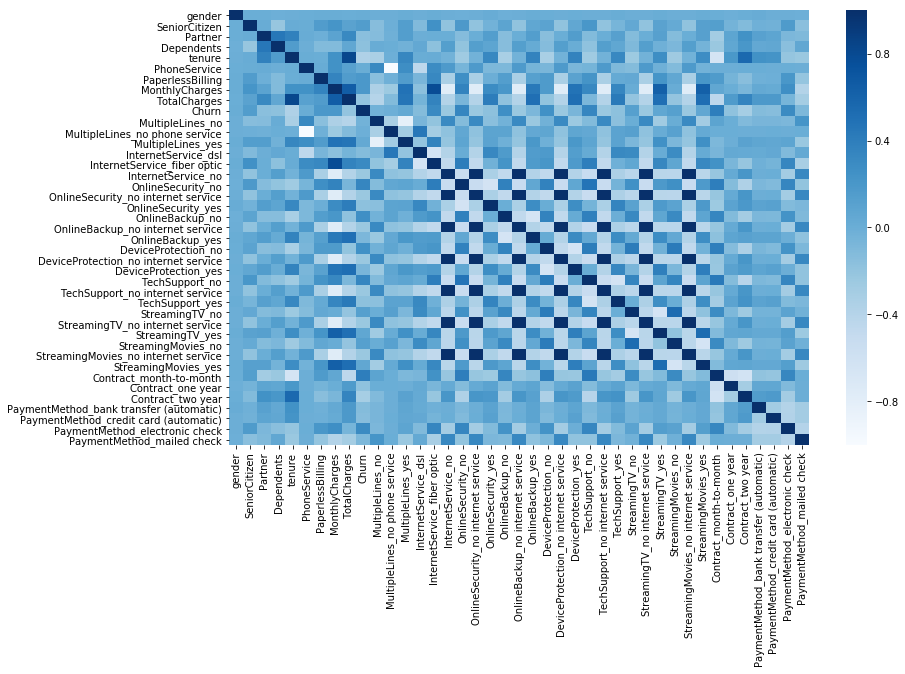

In [ ]:
HeatMap = MatCorrelationHM(proccedData,13,8, False) 

Strong correlations

In [ ]:
cor_t = abs(HeatMap['Churn'])

#Selecting highly correlated features
relevant_features = cor_t[cor_t>0.3]
relevant_features

tenure                            0.352229
Churn                             1.000000
InternetService_fiber optic       0.308020
OnlineSecurity_no                 0.342637
TechSupport_no                    0.337281
Contract_month-to-month           0.405103
Contract_two year                 0.302253
PaymentMethod_electronic check    0.301919
Name: Churn, dtype: float64

In [ ]:
cor_t = abs(HeatMap['tenure'])

#Selecting highly correlated features
relevant_features = cor_t[cor_t>0.5]
relevant_features

tenure                     1.000000
TotalCharges               0.826178
Contract_month-to-month    0.645561
Contract_two year          0.558533
Name: tenure, dtype: float64

In [ ]:
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,no phone service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,0,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one year,0,mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,0,0,0,0,45,0,no phone service,dsl,yes,no,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


## Pré-traitement des données en labelEncoder

In [ ]:
lblencdr=preprocessing.LabelEncoder()
categorial = dataframe[['MultipleLines',
                       'InternetService',
                       'OnlineSecurity',
                       'OnlineBackup',
                       'DeviceProtection',
                        'TechSupport',
                        'StreamingTV',          
                        'StreamingMovies',      
                        'Contract',        
                        'PaymentMethod'] ]       

df_label = categorial.apply(LabelEncoder().fit_transform) 
frame1= dataframe[['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']]

frame2 = dataframe[['gender','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

df_label = pd.concat([ df_label ,frame1], axis=1)
df_label = pd.concat([ df_label ,frame2], axis=1)

display(df_label.head(10))
len(df_label.columns)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,2,0,0,0,0,0,2,1,0,0,1,0,1,0,1,29.85,29.85
1,0,0,2,0,2,0,0,0,1,3,0,0,1,0,0,0,0,34,56.95,1889.50
2,0,0,2,2,0,0,0,0,0,3,0,0,1,1,1,0,0,2,53.85,108.15
3,1,0,2,0,2,2,0,0,1,0,0,0,0,0,0,0,0,45,42.30,1840.75
4,0,1,0,0,0,0,0,0,0,2,0,0,1,1,1,1,0,2,70.70,151.65
5,2,1,0,0,2,0,2,2,0,2,0,0,1,1,1,1,0,8,99.65,820.50
6,2,1,0,2,0,0,2,0,0,1,0,1,1,1,0,0,0,22,89.10,1949.40
7,1,0,2,0,0,0,0,0,0,3,0,0,0,0,0,1,0,10,29.75,301.90
8,2,1,0,0,2,2,2,2,0,2,1,0,1,1,1,1,0,28,104.80,3046.05
9,0,0,2,2,0,0,0,0,1,0,0,1,1,0,0,0,0,62,56.15,3487.95


20

### Affichage de matrice de corrélation

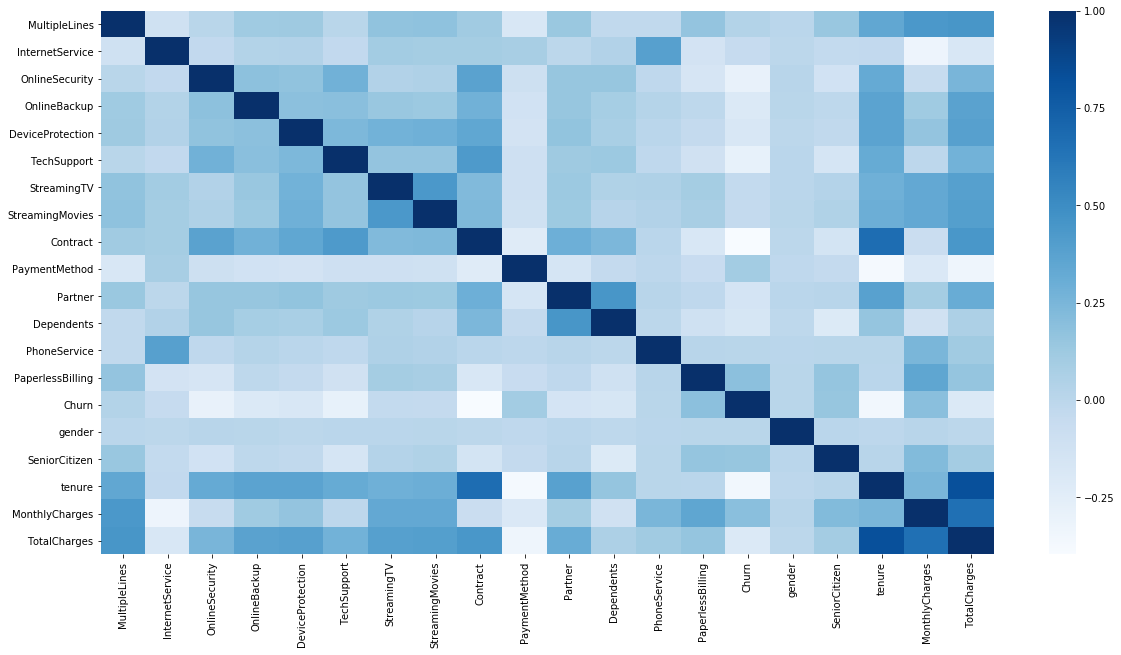

In [ ]:
correlation_df = MatCorrelationHM(df_label,20,10,False)

Correlations

In [ ]:
cor_t = abs(correlation_df['Churn'])

#Selecting highly correlated features
relevant_features = cor_t[cor_t>0.3]
relevant_features

Contract    0.396713
Churn       1.000000
tenure      0.352229
Name: Churn, dtype: float64

In [ ]:
cor_t = abs(correlation_df['tenure'])

#Selecting highly correlated features
relevant_features = cor_t[cor_t>0.5]
relevant_features

Contract        0.671607
tenure          1.000000
TotalCharges    0.826178
Name: tenure, dtype: float64

In [ ]:
cor_t = abs(correlation_df['Contract'])

#Selecting highly correlated features
relevant_features = cor_t[cor_t>0.4]
relevant_features

TechSupport     0.425367
Contract        1.000000
tenure          0.671607
TotalCharges    0.446855
Name: Contract, dtype: float64

## Comparaison des données


gender,0,1
Churn,,
0,2625,2549
1,930,939


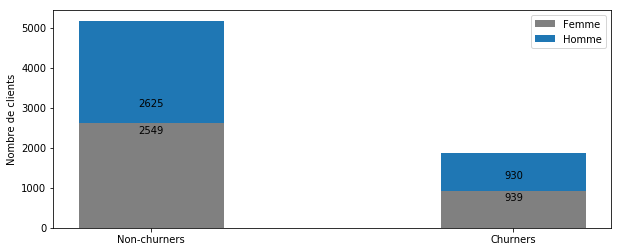

In [ ]:


#display(df_label['gender'].head())
nbr = 2
width = 0.4
indice = np.arange(nbr)

#(df_label['gender'].value_counts().to_numpy())[1] get the amount of women in data
#regroup them create a matrix df_label.groupby(['gender','Churn']).size().unstack(level=0)
display((df_label.groupby(['gender','Churn']).size().unstack(level=0))) #men non churner

men =( (df_label.groupby(['gender','Churn']).size().unstack(level=0))[0][0],(df_label.groupby(['gender','Churn']).size().unstack(level=0))[0][1])

women = ( (df_label.groupby(['gender','Churn']).size().unstack(level=0))[1][0],(df_label.groupby(['gender','Churn']).size().unstack(level=0))[1][1])

p1 = plt.bar(indice,
             men,
            width,
            color='grey')
p2 = plt.bar(indice,
            women,
            width,
            bottom = men)
plt.legend((p1[0], p2[0]), ('Femme', 'Homme'))
plt.ylabel('Nombre de clients')
plt.xticks(indice,
           ('Non-churners','Churners'))

def autolabel(rects,a):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        height += a
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height-a),
                ha='center', va='bottom')

autolabel(p1,200)
autolabel(p2,-350)

plt.show()





Contract

Contract,0,1,2
Churn,,,
0,2220,1307,1647
1,1655,166,48


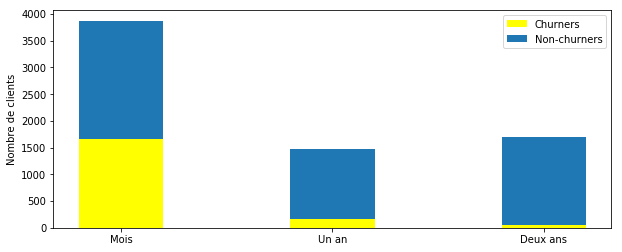

In [ ]:
#display(df_label['gender'].head())
nbr = 3
width = 0.4
indice = np.arange(nbr)

display((df_label.groupby(['Contract','Churn']).size().unstack(level=0)))
non_churners =( (df_label.groupby(['Contract','Churn']).size().unstack(level=0))[0][0],
        (df_label.groupby(['Contract','Churn']).size().unstack(level=0))[1][0],
        (df_label.groupby(['Contract','Churn']).size().unstack(level=0))[2][0])
churners =( (df_label.groupby(['Contract','Churn']).size().unstack(level=0))[0][1],
               (df_label.groupby(['Contract','Churn']).size().unstack(level=0))[1][1],
               (df_label.groupby(['Contract','Churn']).size().unstack(level=0))[2][1])


p1 = plt.bar(indice,
             churners,
            width,
            color='yellow')
p2 = plt.bar(indice,
            non_churners,
            width,
            bottom = churners)

plt.legend((p1[0], p2[0]), ('Churners', 'Non-churners'))
names = ('Mois','Un an', 'Deux ans')
plt.xticks(indice,names)
plt.ylabel('Nombre de clients')


plt.show()

Tenure

Text(0.5,0,'Abonnement (par mois)')

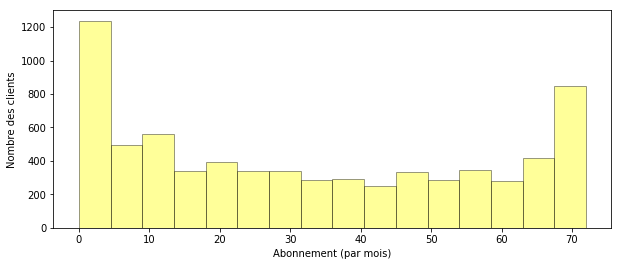

In [ ]:
ax = sns.distplot(df_label['tenure'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
                  color='yellow',
             kde_kws={'linewidth': 4})
ax.set_ylabel('Nombre des clients')
ax.set_xlabel('Abonnement (par mois)')

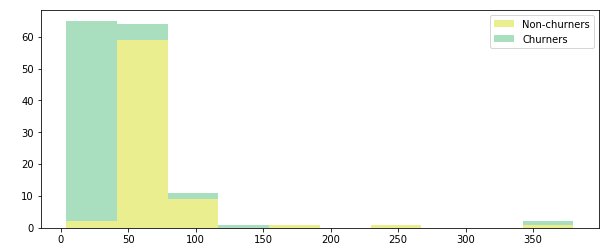

In [ ]:
ax =(df_label.groupby(['tenure','Churn']).size().unstack()).plot(kind='hist',
                                                                           stacked = True,
                                                                          rot = 0,
                                                        color=['#ebee8f','#a9dfbf'])
ax.set_ylabel(' ')
ax.set_xlabel('')
ax.legend(('Non-churners','Churners'))

## Tests et resultats

In [ ]:
PreproccecedDataset = df_dummies

### SVM non parametré

Accuracy svm: 
76.00567912920019
Precision: 
65.9919028340081
Recall: 
27.815699658703068
F1-score: 
39.13565426170468
[[1443   84]
 [ 423  163]]


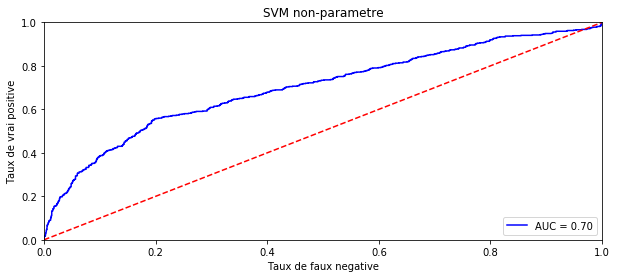

In [ ]:
svm_fun1(PreproccecedDataset)

### Foret aleatoire

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy de forêt aleatoire: 
78.08802650260293
Precision: 
62.20657276995305
Recall: 
46.73721340388007
F1-score: 
53.37361530715005
[[1385  161]
 [ 302  265]]


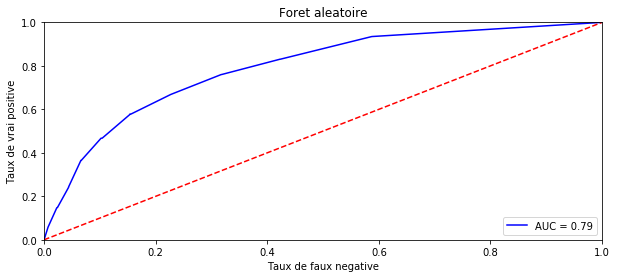

In [ ]:
foretAleatoire(PreproccecedDataset)

### Hyper SVM

Accuracy: 
79.50780880265026
Precision: 
62.93859649122807
Recall: 
52.08711433756806
F1-score: 
57.00099304865939
[[1393  169]
 [ 264  287]]
(array([[ 0.99952685, -0.4470866 , -0.98357081, ..., -0.55019333,
        -0.70535061, -0.55092318],
       [-1.00047337, -0.4470866 , -0.98357081, ..., -0.55019333,
        -0.70535061,  1.8151351 ],
       [-1.00047337, -0.4470866 , -0.98357081, ..., -0.55019333,
        -0.70535061,  1.8151351 ],
       ...,
       [ 0.99952685, -0.4470866 , -0.98357081, ...,  1.81754294,
        -0.70535061, -0.55092318],
       [ 0.99952685, -0.4470866 , -0.98357081, ..., -0.55019333,
        -0.70535061, -0.55092318],
       [ 0.99952685, -0.4470866 ,  1.01670361, ..., -0.55019333,
        -0.70535061,  1.8151351 ]]), array([1, 1, 0, ..., 0, 0, 0]))


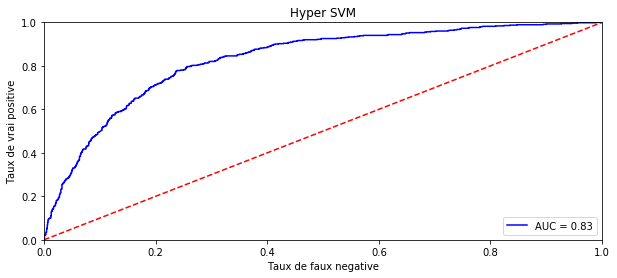

In [ ]:
svm_fun(PreproccecedDataset)

### Arbre de décision

acuuracy d'arbre de decision: 
72.74017983909134
Precision: 
46.81978798586572
Recall: 
49.074074074074076
F1-score: 
47.920433996383366
[[1272  301]
 [ 275  265]]


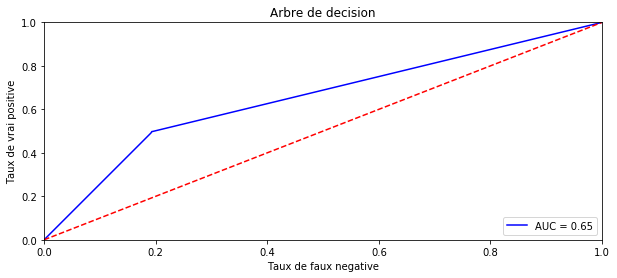

In [ ]:
arbre_decision(PreproccecedDataset)

ROC curve

In [ ]:
import tkinter as tk

root = tk.Tk()
root.

canvas = tk.Canvas(root, height=200, width=200)
canvas.pack()
data = df_label
x= 20
y= 10
show_chart = False
fig = plt.figure(figsize = (x,y))
data = dataframe.corr()
if show_chart == True:
    sns.heatmap(data, 
    xticklabels=data.columns.values,
    yticklabels=data.columns.values,
            annot=True)
else :
    sns.heatmap(data, cmap='Blues')
    
plt.savefig("Corr.png")
lien = r"E:\m2\PFE\Corr.png"
ref = PIL.Image.open(lien)
photo = PIL.ImageTk.PhotoImage(ref.mode,ref.size)



#tof = MatCorrelationHM(df_label,20,10,False)
display(tof)
lab = tk.Label(root, image=photo, text="Photo")
lab.pack()

#MatCorrelationHM(df_label,20,10,False)
root.mainloop()


SyntaxError: ignored

In [ ]:
from tkinter import *
from PIL import ImageTk, Image

#def showw(f):
 #   load = Image.open('Corr.png')
  #  render = ImageTk.PhotoImage(load)

   # img = Label(f, image=render)
    #img.image = render
    #img.place(relx=0, rely=0, relheight=1, relwidth=1)



#create a GUI window.
root = Tk()
#set the title.
#root.title("Welcome to the Pit!")
#set the size.
can = Canvas(root, height=500, width=900)
can.pack()

#f = Frame(root, width=300, height = 300, bg="red", bd=5)
f = tk.Frame(root, bg='green', bd=10)
f.place(relx=0.5, rely=0.1, relwidth=1, relheight=1, anchor='n')

load = Image.open('C:\Users\Dell pc\Desktop\applii\Cor3.png')
render = ImageTk.PhotoImage(load)
img = Label(f, image=render)
img.image = render
img.place(relx=0, rely=0)

lab = tk.Label(f, text="Matrice de corrélation entre les caractéristiques")
lab.place(relx=0, rely=0)
#bou = Button(f, text="img", command=lambda:showw(f))
#bou.pack()

#start the GUI
root.mainloop()